In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from textwrap import wrap

# Load data

In [2]:
order_products_train = pd.read_csv('instacart/order_products__train.csv')
order_products_prior = pd.read_csv('instacart/order_products__prior.csv')
orders = pd.read_csv('instacart/orders.csv')
products = pd.read_csv('instacart/products.csv')
aisles = pd.read_csv('instacart/aisles.csv')
departments = pd.read_csv('instacart/departments.csv')

In [3]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [4]:
print(order_products_prior.shape)
order_products_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
# merging all the product info with aisle and deparment
product_info=products.merge(aisles,on='aisle_id').merge(departments,on='department_id')

In [10]:
product_info.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,78,Nutter Butter Cookie Bites Go-Pak,61,19,cookies cakes,snacks
2,102,Danish Butter Cookies,61,19,cookies cakes,snacks
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19,cookies cakes,snacks
4,285,Mini Nilla Wafers Munch Pack,61,19,cookies cakes,snacks


In [11]:
#merging train and test data
order_product_all=pd.concat([order_products_train, order_products_prior])
order_product_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## Frequency of order by day of week

In [12]:
# Frequency of order by weekday
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


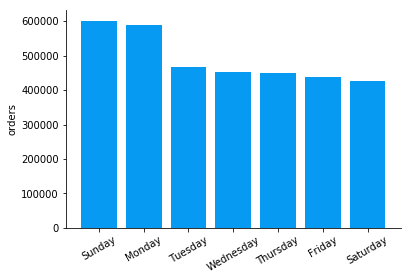

In [83]:
day_order = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
dow=orders['order_dow'].value_counts()

plt.bar(day_order,dow,tick_label=day_order, color='xkcd:azure')
plt.title('Frequency of order by day of week')
plt.ylabel('orders')
plt.gca().tick_params(axis='x',rotation=30)
plt.gca().spines['top'].set_visible(False)
# plt.savefig('instacart_fig/Daily.png', bbox_inches='tight', transparent=True)

## Frequency of orders by hour

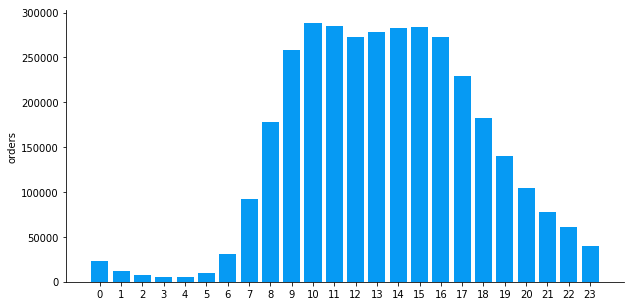

In [85]:
hour=orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hour.index,hour, color='xkcd:azure')
plt.title('Frequency of orders by hour')
plt.ylabel('orders')
plt.gca().spines['top'].set_visible(False)
plt.xticks(hour.index)
# plt.savefig('instacart_fig/Hour.png', bbox_inches='tight', transparent=True)

## The number of orders by day of week x hour

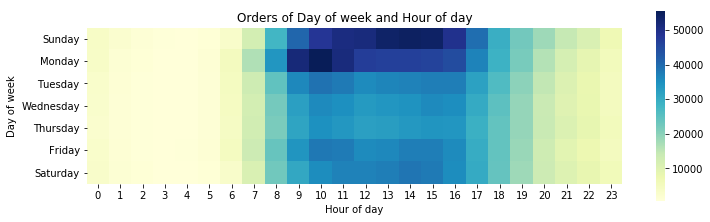

In [31]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,7))
fig=sns.heatmap(grouped_df, yticklabels=day_order, cmap="YlGnBu", square=True, cbar_kws={"shrink": .5})
plt.title("Orders of Day of week and Hour of day")
plt.xlabel('Hour of day')
plt.ylabel('Day of week')
plt.savefig('instacart_fig/dayhour.png', bbox_inches='tight', transparent=True)

## Days since prior order

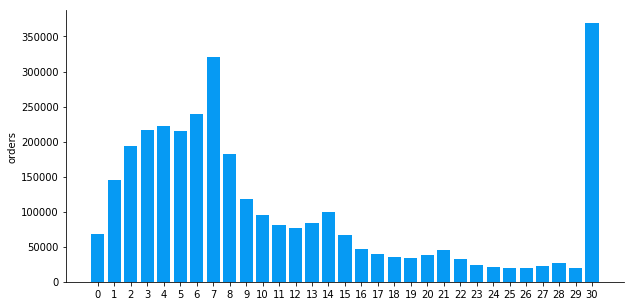

In [86]:
orders.head()
hour=orders['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hour.index,hour, color='xkcd:azure')
plt.gca().spines['top'].set_visible(False)
plt.title('Days since prior order')
plt.ylabel('orders')
plt.xticks(hour.index)
# plt.savefig('instacart_fig/dayssince.png', bbox_inches='tight', transparent=True)

## Percentage of reorders

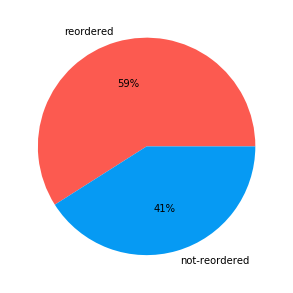

In [92]:
all_df=order_product_all.copy()
reorder=all_df['reordered'].value_counts()
colors=['xkcd:coral','xkcd:azure']

plt.figure(figsize=(10,5))
plt.pie(reorder, labels=['reordered','not-reordered'],colors=colors, autopct='%1.0f%%')
plt.title('Reorder percentage')
# plt.savefig('instacart_fig/reorder.png', bbox_inches='tight', transparent=True)

## Most popular items Top20

In [94]:
product_df=order_product_all.merge(products,on='product_id')

In [95]:
product_df.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
5,2445303,49302,2,1,Bulgarian Yogurt,120,16
6,2853065,49302,12,1,Bulgarian Yogurt,120,16
7,3231517,49302,6,1,Bulgarian Yogurt,120,16
8,38841,49302,5,1,Bulgarian Yogurt,120,16
9,45900,49302,19,0,Bulgarian Yogurt,120,16


In [37]:
bestitem=product_df['product_name'].value_counts().head(20).reset_index()
bestitem.columns=['product','count']

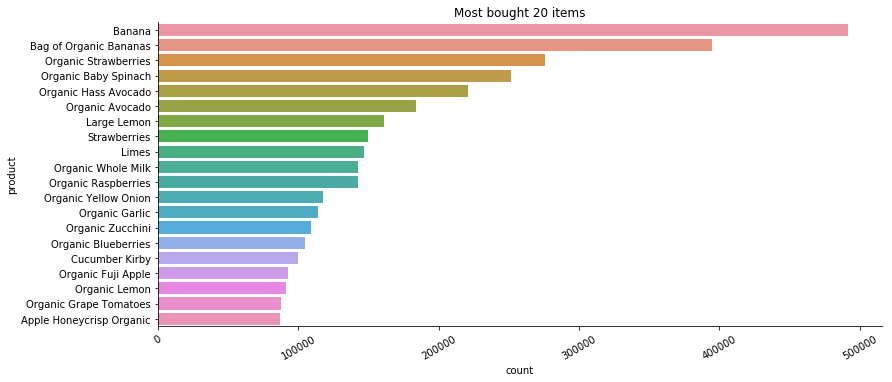

In [39]:
fig=sns.catplot(x='count',y='product',kind='bar',data=bestitem, aspect=2.5, legend_out=True)
fig.set_xticklabels(rotation=30)
plt.title('Most bought 20 items')
# plt.savefig('instacart_fig/popularitems.png', bbox_inches='tight', transparent=True)

## Most reordered items

In [40]:
best_reordered=product_df[product_df['reordered']==1]['product_name'].value_counts().head(20).reset_index()
best_reordered.columns=['product','count']

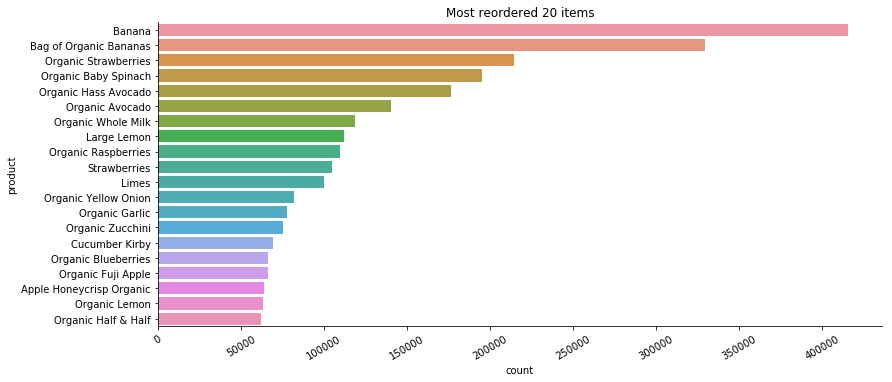

In [96]:
fig=sns.catplot(x='count',y='product',kind='bar',data=best_reordered, aspect=2.5, legend_out=True)
fig.set_xticklabels(rotation=30)
plt.title('Most reordered 20 items')
# plt.savefig('instacart_fig/mostreordered.png', bbox_inches='tight', transparent=True)

## Popular Aisles and Departments

In [43]:
aisle_df=product_df.merge(aisles,on='aisle_id')

In [48]:
bestaisle=aisle_df['aisle'].value_counts().head(20).reset_index()
bestaisle.columns=['aisle','count']
bestaisle.head()

,aisle,count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462


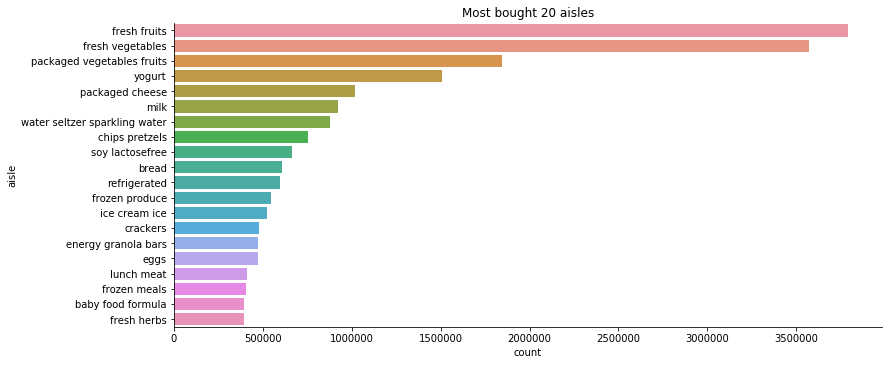

In [55]:
fig=sns.catplot(x='count',y='aisle',kind='bar',data=bestaisle, aspect=2.5, legend_out=True)
plt.title('Most bought 20 aisles')
# plt.savefig('instacart_fig/popularaisles.png', bbox_inches='tight', transparent=True)

In [101]:
dept_df=product_df.merge(departments,on='department_id')
bestdept=dept_df['department'].value_counts().reset_index()
bestdept.columns=['dept','count']
bestdept.head()

,dept,count
0,produce,9888378
1,dairy eggs,5631067
2,snacks,3006412
3,beverages,2804175
4,frozen,2336858


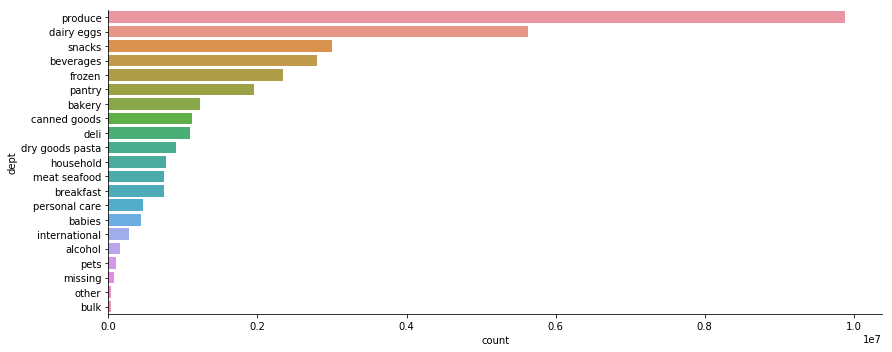

In [102]:
fig=sns.catplot(x='count',y='dept',kind='bar',data=bestdept, aspect=2.5, legend_out=True)
# plt.title('Most bought 20 depts')
plt.savefig('instacart_fig/populardepts.png', bbox_inches='tight', transparent=True)

# Association Rules Generation from Frequent Itemsets

An association rule is an implication expression of the form X→Y, where X and Y are disjoint itemsets. <br>A more concrete example based on consumer behaviour would be {Diapers}→{Beer} suggesting that people who buy diapers are also likely to buy beer. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the confidence and lift metrics.

## Metrics

(1) 'support':<br>
support(A→C) = support(A∪C),range: (0,1)
<br><br>
(2) 'confidence':<br>
confidence(A→C) = support(A→C)/support(A), range: (0,1)<br><br>
The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.<br><br>
(3) 'lift':<br>
lift(A→C) = confidence(A→C)/support(C), range: (0,∞)<br><br>
The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

In [12]:
# including only reordered products

reordered=order_product_all[order_product_all['reordered']==1].merge(products,on='product_id')

In [13]:
reordered.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,2445303,49302,2,1,Bulgarian Yogurt,120,16


In [116]:
reordered['order_id'].max()

3421083

In [14]:
# including data whose transaction number is less than 50000
# since the data is so huge
df=reordered[reordered['order_id']<=50000]

In [15]:
# Order list size
orderlist=df['order_id'].unique()
orderlist.size

43040

In [16]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
7,38841,49302,5,1,Bulgarian Yogurt,120,16
108,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
215,1084,11109,4,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
216,1175,11109,14,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16


In [17]:
# Transforming data for mlxtend toolbox 
transaction=[]
for order in orderlist:
    temp=df[df['order_id']==order]['product_name'].to_list()
    transaction.append(temp)

In [18]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
tsdata = pd.DataFrame(te_ary, columns=te.columns_)

In [19]:
tsdata.head()

,#2 Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Acai Raspberry Water Beverage,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Greek Yogurt Black Cherry on the Bottom,0% Fat Greek Yogurt Vanilla,0% Fat Organic Greek Vanilla Yogurt,...,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from mlxtend.frequent_patterns import fpgrowth

# Since the number of items is huge, minimum support value was set as 0.001 
# in order to include most of item sets in analysis

frequent_item=fpgrowth(tsdata, min_support=0.001, use_colnames=True)
frequent_item['length'] = frequent_item['itemsets'].apply(lambda x: len(x))

In [124]:
frequent_item.shape

(2209, 3)

In [21]:
frequent_item=frequent_item.sort_values(by=['support'],ascending=False)
frequent_item.head()

,support,itemsets,length
28,0.141148,(Banana),1
1,0.112732,(Bag of Organic Bananas),1
46,0.071445,(Organic Strawberries),1
59,0.067542,(Organic Baby Spinach),1
124,0.060223,(Organic Hass Avocado),1


In [22]:
from mlxtend.frequent_patterns import association_rules

# if lift value is 1, two items are independent

association=association_rules(frequent_item, metric="lift", min_threshold=1)
association['Alength'] = association['antecedents'].apply(lambda x: len(x))
association['Clength'] = association['consequents'].apply(lambda x: len(x))

In [23]:
association=association.sort_values(by='lift',ascending=False)
association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Alength,Clength
1914,(Total 2% Lowfat Greek Strained Yogurt with Pe...,(Total 2% Lowfat Greek Strained Yogurt With Bl...,0.002300,0.005669,0.001185,0.515152,90.869349,0.001172,2.050807,2,1
1919,(Total 2% Lowfat Greek Strained Yogurt With Bl...,(Total 2% Lowfat Greek Strained Yogurt with Pe...,0.005669,0.002300,0.001185,0.209016,90.869349,0.001172,1.261341,1,2
1916,(Total 2% Lowfat Greek Strained Yogurt With Bl...,(Total 2% Lowfat Greek Strained Yogurt with Pe...,0.002718,0.005019,0.001185,0.435897,86.856600,0.001171,1.763831,2,1
1917,(Total 2% Lowfat Greek Strained Yogurt with Pe...,(Total 2% Lowfat Greek Strained Yogurt With Bl...,0.005019,0.002718,0.001185,0.236111,86.856600,0.001171,1.305532,1,2
934,(Non Fat Raspberry Yogurt),(Icelandic Style Skyr Blueberry Non-fat Yogurt),0.003996,0.004833,0.001673,0.418605,86.618962,0.001654,1.711688,1,1


In [128]:
association[['antecedents','consequents','antecedent support','consequent support','confidence','lift']].head()

,antecedents,consequents,antecedent support,consequent support,confidence,lift
1919,(Total 2% Lowfat Greek Strained Yogurt With Bl...,(Total 2% with Strawberry Lowfat Greek Straine...,0.005669,0.002300,0.209016,90.869349
1914,(Total 2% with Strawberry Lowfat Greek Straine...,(Total 2% Lowfat Greek Strained Yogurt With Bl...,0.002300,0.005669,0.515152,90.869349
1918,(Total 2% Lowfat Greek Strained Yogurt with Pe...,(Total 2% with Strawberry Lowfat Greek Straine...,0.005019,0.002718,0.236111,86.856600
1915,(Total 2% with Strawberry Lowfat Greek Straine...,(Total 2% Lowfat Greek Strained Yogurt with Pe...,0.002718,0.005019,0.435897,86.856600
935,(Non Fat Raspberry Yogurt),(Icelandic Style Skyr Blueberry Non-fat Yogurt),0.003996,0.004833,0.418605,86.618962


## Function for printing out top 5 items most bought together

In [129]:
# print top 5 items which have highest lift
def big5(basket):
    for item in basket:
        single=association[association['antecedents'].apply(lambda x: item in x) & association['Alength']==1][['antecedents','consequents','lift']][:5]
        double=association[association['antecedents'].apply(lambda x: item in x)][['antecedents','consequents','lift']][:5]
        return pd.concat([single,double],axis=0)

In [130]:
big5(['Banana'])

,antecedents,consequents,lift
1677,(Banana),"(Strawberries, Organic Avocado)",3.385644
2353,(Banana),"(Strawberries, Large Lemon)",3.291915
1875,(Banana),"(Honeycrisp Apple, Organic Avocado)",3.226102
983,(Banana),"(Organic Avocado, Organic Whole Milk)",3.203942
1157,(Banana),"(Cucumber Kirby, Organic Avocado)",3.111556
1712,"(Large Lemon, Banana)",(Cucumber Kirby),5.373220
1320,"(Banana, Limes)",(Large Lemon),5.200786
489,"(Large Lemon, Banana)",(Organic Avocado),4.975965
1036,"(Banana, Limes)",(Organic Avocado),4.649957
1154,"(Organic Avocado, Banana)",(Cucumber Kirby),4.580973


In [24]:
# replace frozenset to string
lift=association.copy()
lift['antecedents']=lift['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
lift['consequents']=lift['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [25]:
# make a new column including sorted list of ant and cons
lift['pair']=lift.apply(lambda row: ', '.join(sorted([row.antecedents,row.consequents])), axis=1)

In [26]:
lift['label']=lift.apply(lambda row: '---'.join(sorted([row.antecedents,row.consequents])), axis=1)

In [30]:
df=lift[lift['Alength']==1].drop_duplicates(subset='pair',keep='first')#
df.shape

(1258, 13)

## Top 20 item pairs by lift metric

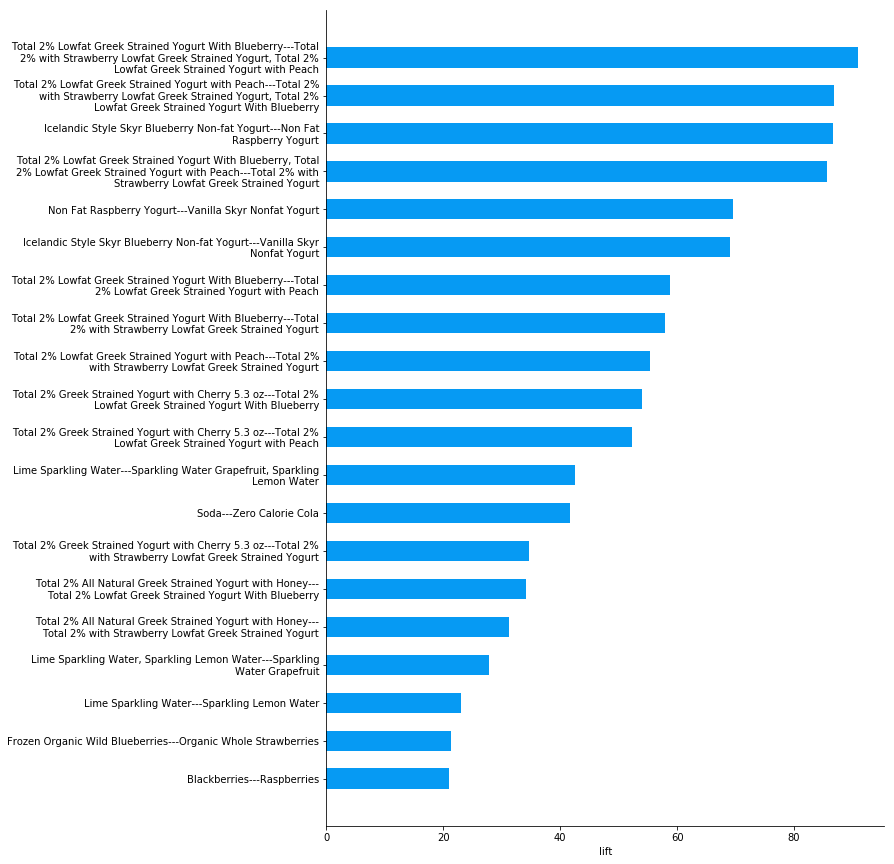

In [136]:
# modifying labels for visualization
labels=df['label']
labels = [ '\n'.join(wrap(l, 60)) for l in labels ]

# spacing btw bars
y_pos = np.arange(0,30,1.5)

# drawing pictures
plt.figure(figsize=(10,15))
plt.barh(y_pos,df['lift'],color='xkcd:azure')
plt.yticks(y_pos,labels)
plt.title('Top 20 itemsets by lift')
plt.gca().spines['top'].set_visible(False)
plt.xlabel('lift')
plt.gca().invert_yaxis()
# plt.savefig('instacart_fig/topliftitemset.png', bbox_inches='tight', transparent=True)

## Top 50 lift items and their relationships 

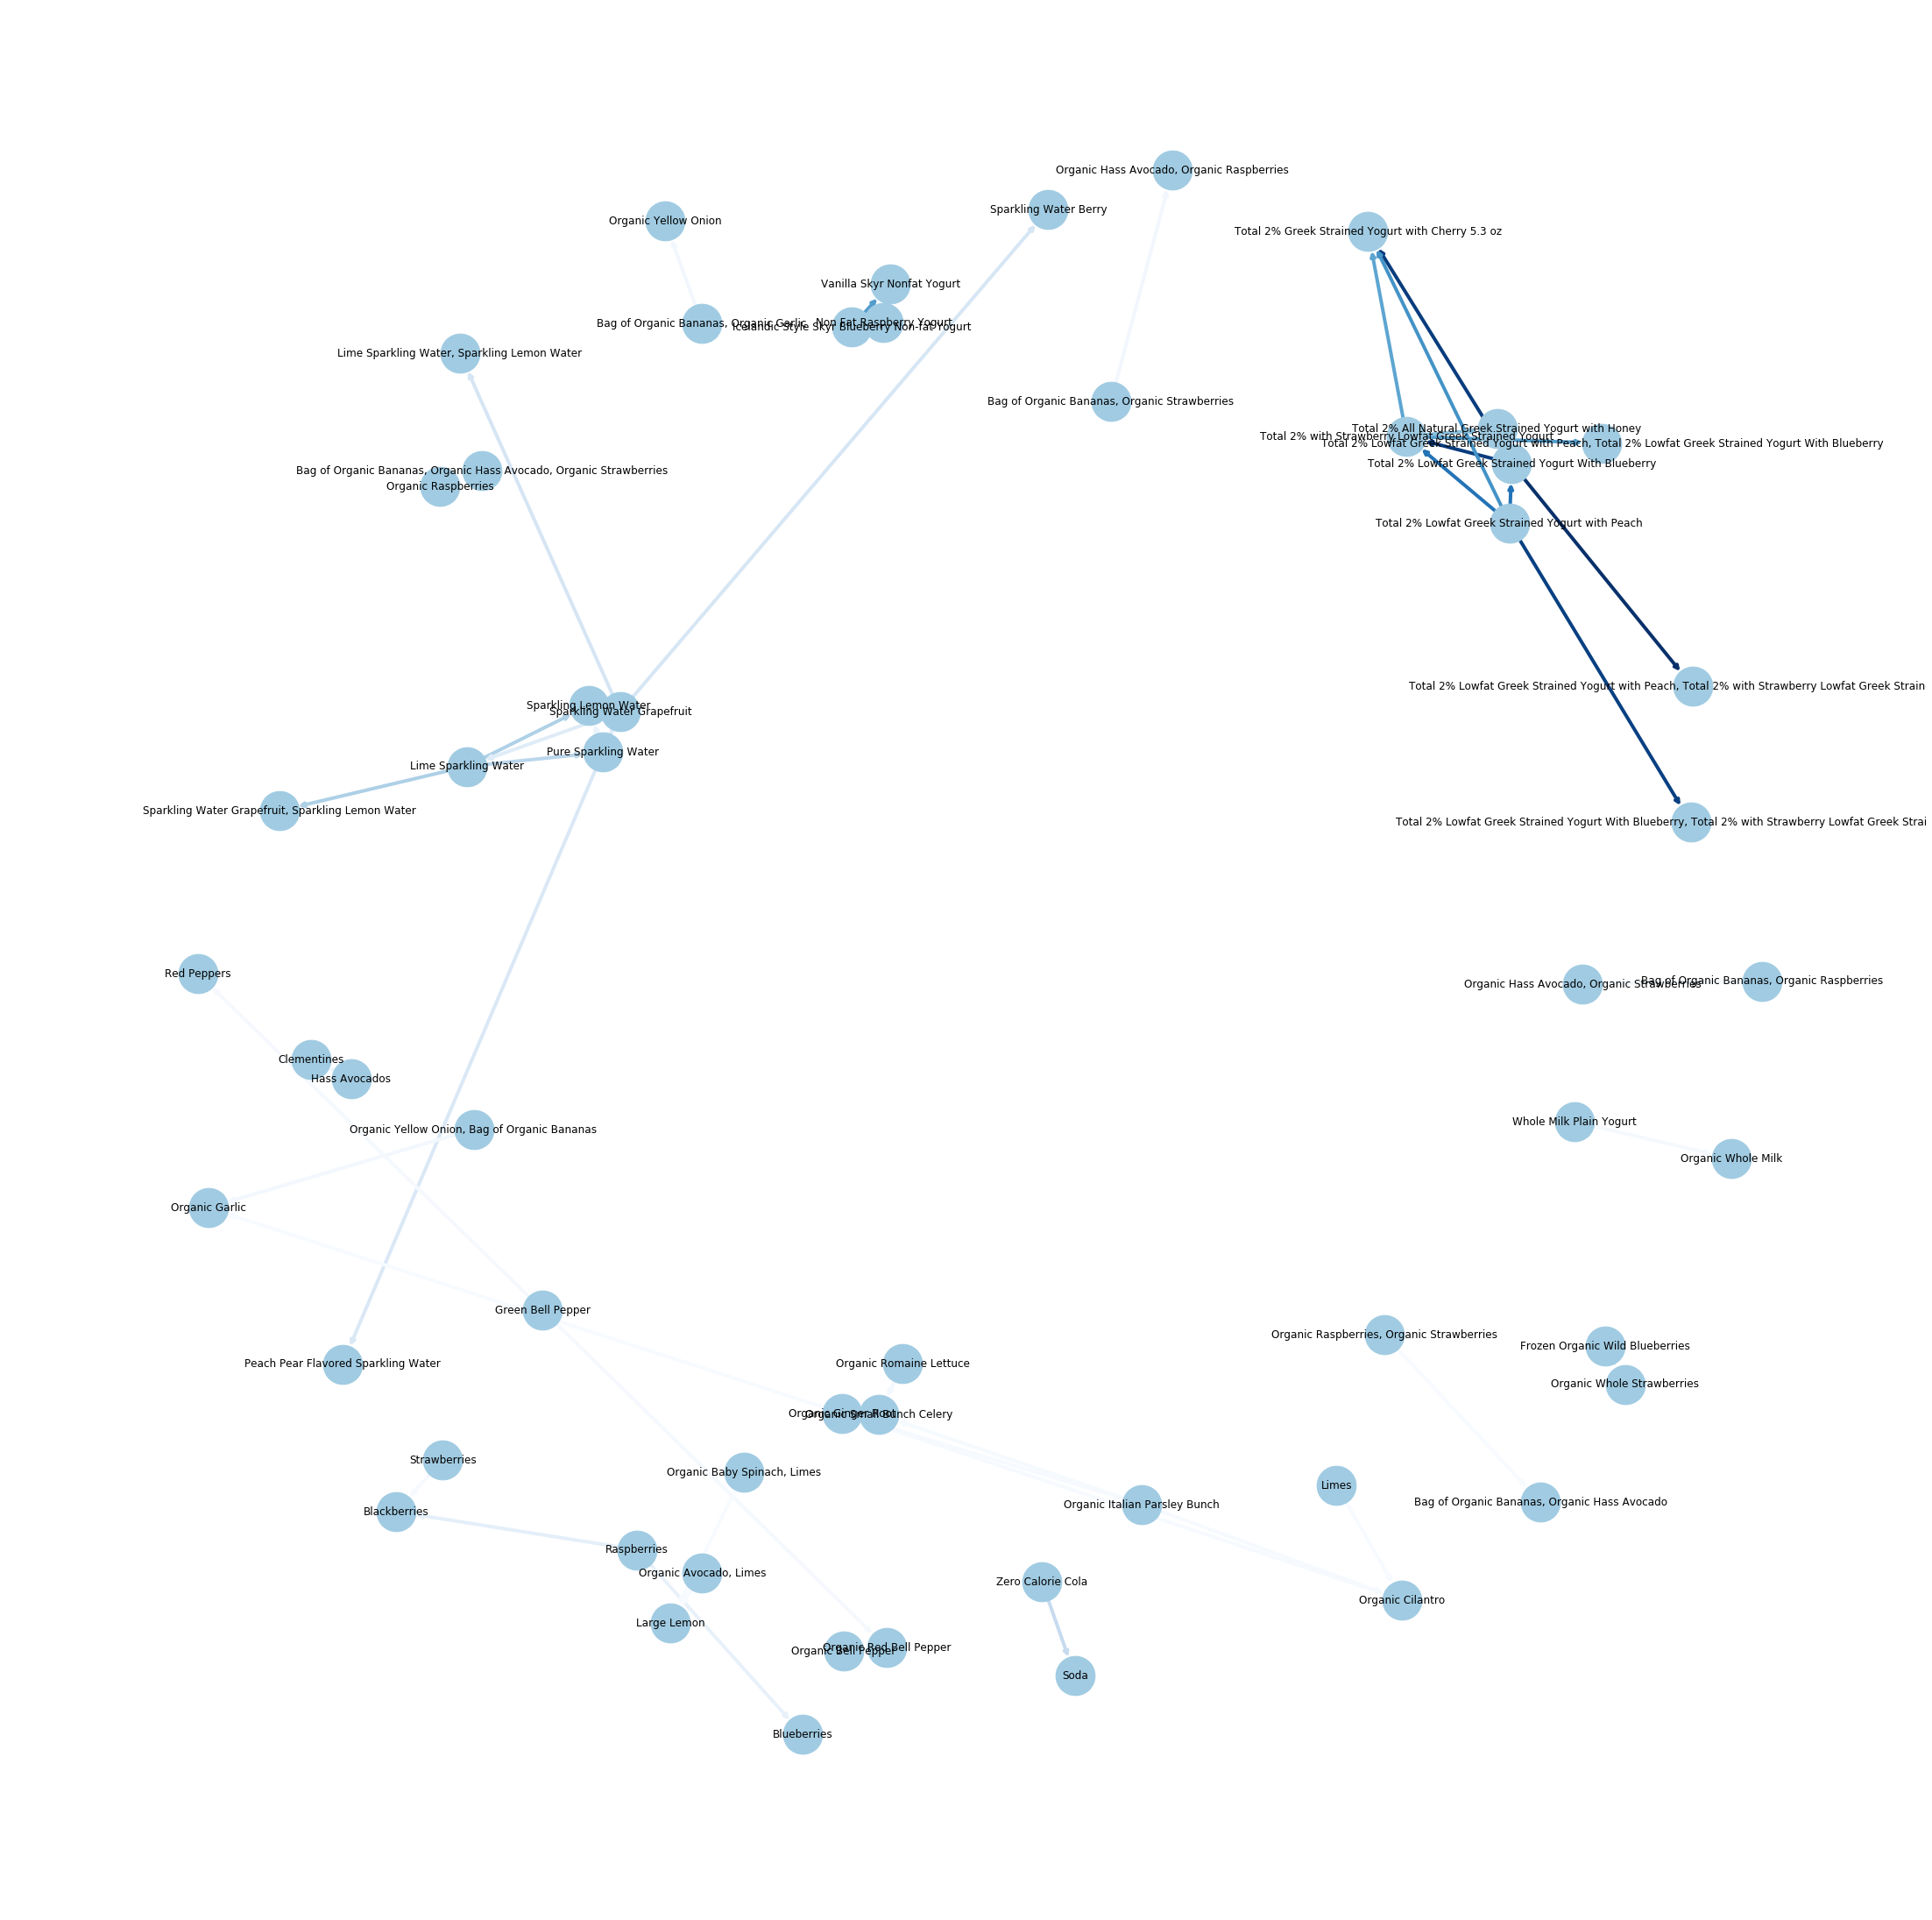

In [53]:
#   
# ------- DIRECTED
 
# Build a dataframe with your connections

df=lift[lift['Alength']==1].drop_duplicates(subset='pair',keep='first').head(50)
df=df[['antecedents','consequents','lift','confidence','label']]


# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'antecedents', 'consequents', create_using=nx.DiGraph() )
 
# Make the graph
plt.figure(figsize=(30,30))
nx.draw(G, with_labels=True,node_size=2000, node_color='#A0CBE2',alpha=1, edge_color=df['lift'].to_list(),width=4, edge_cmap=plt.cm.Blues)
# plt.savefig('instacart_fig/network.png', bbox_inches='tight') 


## Top 50 lift items and their relationships by departments

In [161]:
df=lift[(lift['Alength']==1) & (lift['Clength']==1)].drop_duplicates(subset='pair',keep='first')

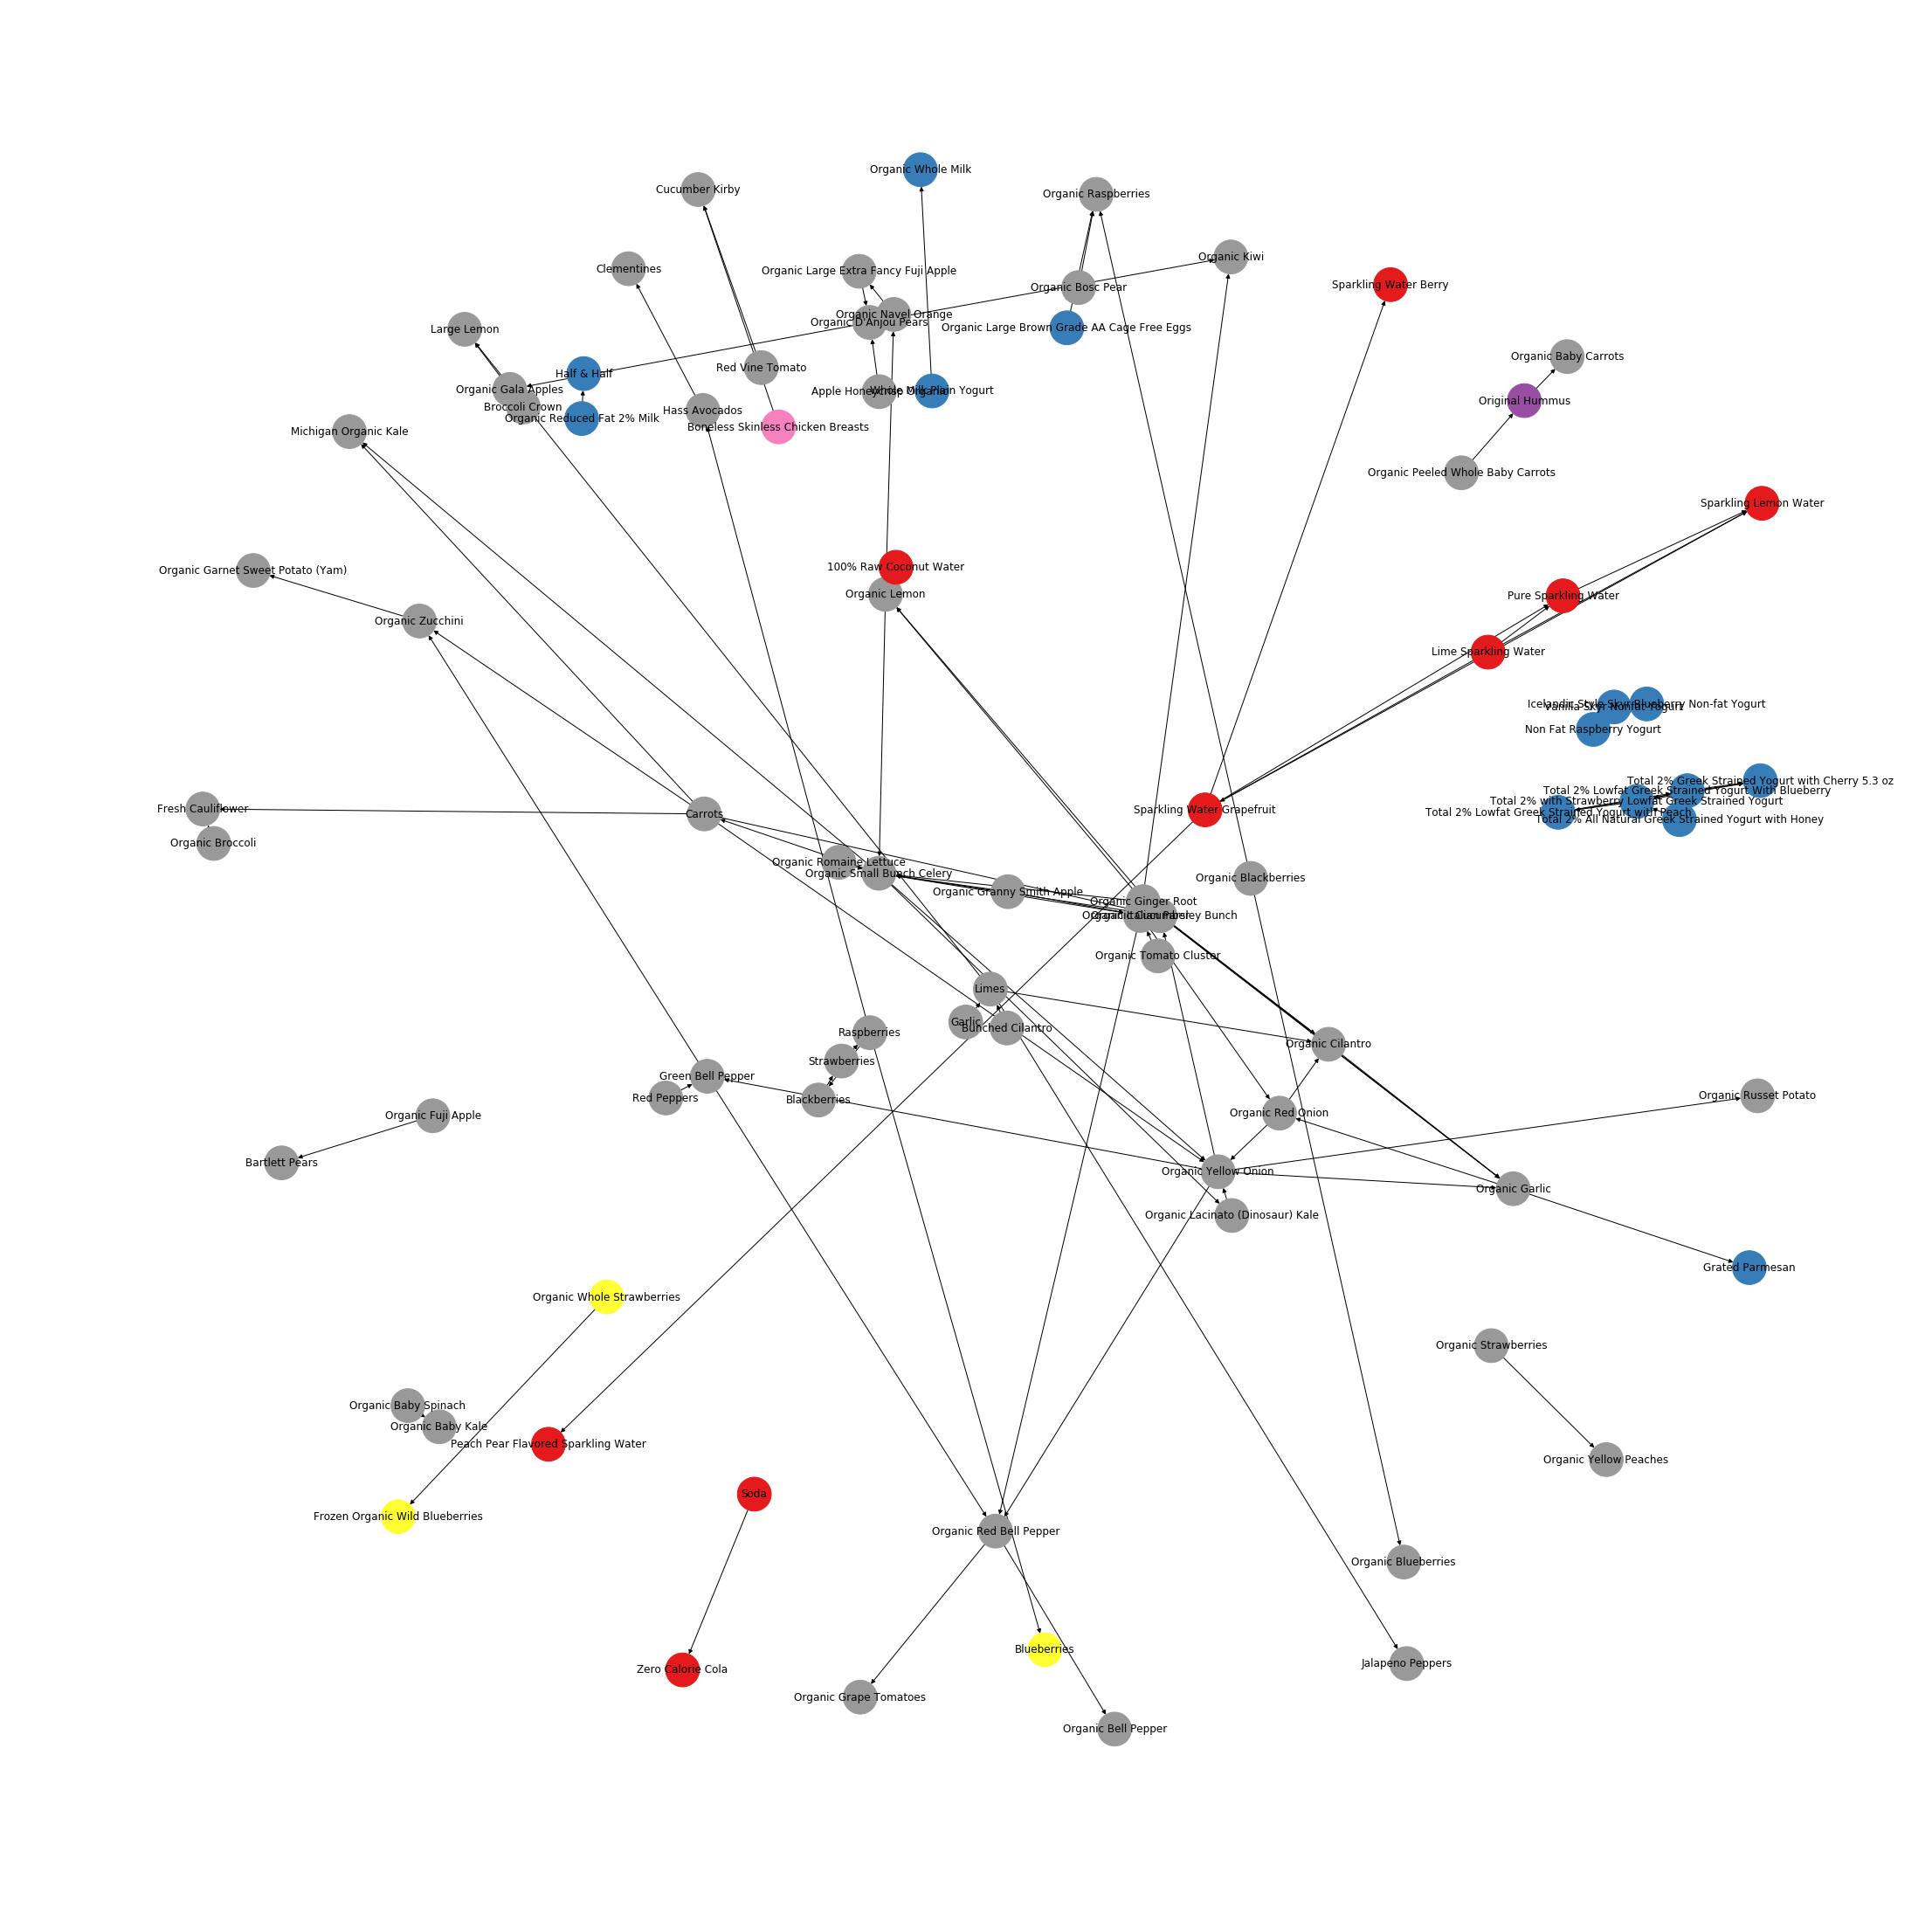

In [160]:
# Build a dataframe with your connections

 
# And a data frame with characteristics for your nodes
carac = product_info[['product_name','department']] 

# Build your graph
G=nx.from_pandas_edgelist(df, 'antecedents', 'consequents', create_using=nx.DiGraph() )
 
# The order of the node for networkX is the following order:
G.nodes()
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('product_name')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['department'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
plt.figure(figsize=(30,30))
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=1500)
plt.savefig('instacart_fig/network_depts.png', bbox_inches='tight')